In [4]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
#load dataset
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

In [5]:
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)#shuffle the dataset
tf.random.set_seed(116)
x_train = x_data[:-30] #train data select
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:] #test data select
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32) #data cast to prevent error

In [6]:
# mini batch
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # learning rate 0.1
train_loss_results = []  
test_acc = [] 
epoch = 500  # iteract 500 times
loss_all = 0  

In [7]:
# train
for epoch in range(epoch):  #epoch to all dataset
    for step, (x_train, y_train) in enumerate(train_db):  #a step,a batch
        with tf.GradientTape() as tape:  # with gradient
            y = tf.matmul(x_train, w1) + b1  
            y = tf.nn.softmax(y)  # softmax classfication
            y_ = tf.one_hot(y_train, depth=3)  # one-hot
            loss = tf.reduce_mean(tf.square(y_ - y))  
            loss_all += loss.numpy()  
        grads = tape.gradient(loss, [w1, b1])
        w1.assign_sub(lr * grads[0])  # wight update
        b1.assign_sub(lr * grads[1])  # bias update

    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4) 
    loss_all = 0  #loss guiling

Epoch 0, loss: 0.2821310982108116
Epoch 1, loss: 0.25459614023566246
Epoch 2, loss: 0.22570250183343887
Epoch 3, loss: 0.21028399094939232
Epoch 4, loss: 0.19942265003919601
Epoch 5, loss: 0.18873637914657593
Epoch 6, loss: 0.17851299792528152
Epoch 7, loss: 0.16922875493764877
Epoch 8, loss: 0.16107673570513725
Epoch 9, loss: 0.15404684469103813
Epoch 10, loss: 0.14802726358175278
Epoch 11, loss: 0.14287303388118744
Epoch 12, loss: 0.1384414229542017
Epoch 13, loss: 0.13460607640445232
Epoch 14, loss: 0.1312607228755951
Epoch 15, loss: 0.12831822223961353
Epoch 16, loss: 0.12570795230567455
Epoch 17, loss: 0.12337298691272736
Epoch 18, loss: 0.12126746214926243
Epoch 19, loss: 0.11935433372855186
Epoch 20, loss: 0.11760355532169342
Epoch 21, loss: 0.11599067784845829
Epoch 22, loss: 0.11449568346142769
Epoch 23, loss: 0.11310208216309547
Epoch 24, loss: 0.11179621890187263
Epoch 25, loss: 0.11056672222912312
Epoch 26, loss: 0.1094040758907795
Epoch 27, loss: 0.10830027796328068
Epoch 

Epoch 249, loss: 0.04417197126895189
Epoch 250, loss: 0.044084908440709114
Epoch 251, loss: 0.04399843979626894
Epoch 252, loss: 0.04391254112124443
Epoch 253, loss: 0.04382720682770014
Epoch 254, loss: 0.04374244436621666
Epoch 255, loss: 0.043658239766955376
Epoch 256, loss: 0.04357459209859371
Epoch 257, loss: 0.0434914892539382
Epoch 258, loss: 0.04340892005711794
Epoch 259, loss: 0.043326896615326405
Epoch 260, loss: 0.043245404958724976
Epoch 261, loss: 0.043164435774087906
Epoch 262, loss: 0.04308399651199579
Epoch 263, loss: 0.043004064820706844
Epoch 264, loss: 0.04292465001344681
Epoch 265, loss: 0.04284573905169964
Epoch 266, loss: 0.04276734031736851
Epoch 267, loss: 0.0426894286647439
Epoch 268, loss: 0.04261200875043869
Epoch 269, loss: 0.0425350870937109
Epoch 270, loss: 0.04245864413678646
Epoch 271, loss: 0.0423826826736331
Epoch 272, loss: 0.04230719245970249
Epoch 273, loss: 0.042232176288962364
Epoch 274, loss: 0.0421576201915741
Epoch 275, loss: 0.04208353161811828

Epoch 476, loss: 0.03292280528694391
Epoch 477, loss: 0.03289463324472308
Epoch 478, loss: 0.0328665585257113
Epoch 479, loss: 0.03283859835937619
Epoch 480, loss: 0.03281073225662112
Epoch 481, loss: 0.032782971393316984
Epoch 482, loss: 0.032755312509834766
Epoch 483, loss: 0.03272775420919061
Epoch 484, loss: 0.03270029556006193
Epoch 485, loss: 0.03267294634133577
Epoch 486, loss: 0.03264568978920579
Epoch 487, loss: 0.032618533819913864
Epoch 488, loss: 0.03259148681536317
Epoch 489, loss: 0.03256453387439251
Epoch 490, loss: 0.0325376745313406
Epoch 491, loss: 0.03251091530546546
Epoch 492, loss: 0.032484252005815506
Epoch 493, loss: 0.0324576823040843
Epoch 494, loss: 0.03243121039122343
Epoch 495, loss: 0.03240483347326517
Epoch 496, loss: 0.03237855713814497
Epoch 497, loss: 0.03235236741602421
Epoch 498, loss: 0.03232627175748348
Epoch 499, loss: 0.032300276681780815


Test_acc: 1.0
--------------------------


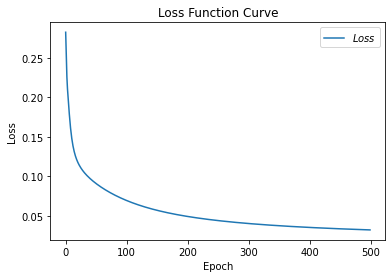

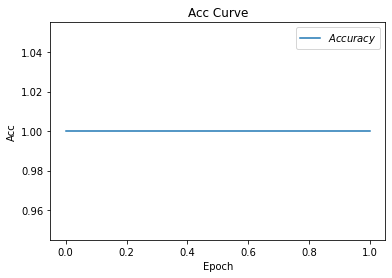

In [9]:
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  #max number(class)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

plt.title('Loss Function Curve')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.plot(train_loss_results, label="$Loss$") 
plt.legend()  
plt.show()
plt.title('Acc Curve')
plt.xlabel('Epoch')  
plt.ylabel('Acc')  
plt.plot(test_acc, label="$Accuracy$") 
plt.legend()
plt.show()